# kNN Classifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Generating Data

In [3]:
def generate_synthetic_data(num_of_classes = 3, num_points_per_class=100, cluster_std=1.0):
    np.random.seed(40)
    X     = []
    y     = []
    means = []

    for i in range(num_of_classes):
        angle      = 2 * np.pi * i / num_of_classes
        radius     = 3
        #x= r * math.cos(theta), y = r * math.sin(theta)  # Convert polar coordinates (r, theta) to Cartesian coordinates (x, y)
        mean       = [radius * np.cos(angle), radius * np.sin(angle)]
        cov        = [[cluster_std, 0],[0, cluster_std]]
        class_data = np.random.multivariate_normal(mean, cov, num_points_per_class)
        y         += [i] * num_points_per_class

        X.append(class_data)
        mean.append(means)
    
    X = np.vstack(X)
    y = np.array(y)

    return X, y, means


(250, 2)


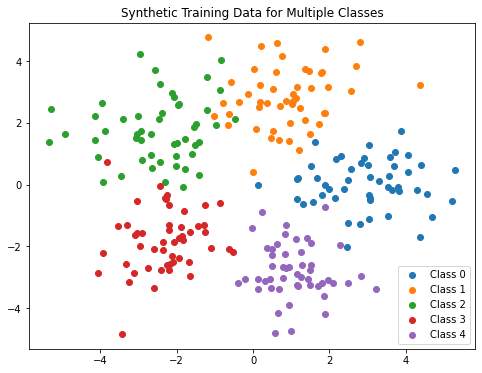

In [4]:
num_of_classes = 5  # number of classes
num_points_per_class = 50
cluster_std = 1.0

X, y, class_means = generate_synthetic_data(num_of_classes =num_of_classes, 
                                     num_points_per_class=num_points_per_class,
                                     cluster_std=cluster_std)
print(X.shape)
plt.figure(figsize=(8,6))
colors = plt.colormaps['tab10'].colors
for i in range(num_of_classes):
    #X[y == i, 0] and X[y == i, 1]: These expressions select the data points
    #from the array X where the corresponding labels in y are equal to i.
    #X is assumed to be a 2D array where rows represent samples and columns represent
    # features. X[y == i, 0] selects the first feature (x-coordinate) of the samples
    # belonging to class i, and X[y == i, 1] selects the second feature (y-coordinate)
    # of the same samples.
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=f'Class {i}')#[Appendix1]
plt.title('Synthetic Training Data for Multiple Classes')
plt.legend()
plt.show()

## Implement the Algorithm

In [5]:
class KnnClassifier:
    def __init__(self, k = 3, distance_function = None):
        self.k = k
        if distance_function is None:
            self.distance_function = self._euclidean_distance
        else:
            self.distance_function = distance_function
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        pass

    def _minkowski_distance(self, x1, x2, p=3):
        pass

    def predict(self, X):
        predictions = []
        for index, x in enumerate(X):
            distances = [self.distance_function(x, x_train) for x_train in self.X_train]
            # indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # labels of the k nearest neighbors
            k_neighbor_labels = self.y_train[k_indices]
            # majority vote
            counts = np.bincount(k_neighbor_labels.astype(int))
            predicted_label = np.argmax(counts)
            predictions.append(predicted_label)  
        return np.array(predictions)



In [6]:
test_size = 0.2  # 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

print(f"Total samples: {X.shape[0]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Total samples: 250
Training samples: 200
Testing samples: 50


## Plot Decision Doundaries

In [7]:
# Create coordinate vectors
x = np.arange(0, 3, 1)  # [0, 1, 2]
y = np.arange(0, 2, 1)  # [0, 1]

# Generate the meshgrid
X, Y = np.meshgrid(x, y)

print("X:\n", X)
# Output:
# [[0 1 2]
#  [0 1 2]]

print("Y:\n", Y)
# Output:
# [[0 0 0]
#  [1 1 1]]

X:
 [[0 1 2]
 [0 1 2]]
Y:
 [[0 0 0]
 [1 1 1]]


In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = 0.1
xx, yy  = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx)

[[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
  -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
  -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
   2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
   6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
 [-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
  -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
  -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
   2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
   6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
 [-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
  -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
  -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
   2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
   6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
 [-1.00

In [9]:
def plot_decision_boundaries(classifier, X, y, means, title="Decision Boundaries"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = 0.1
    xx, yy      = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z           = classifier.predict(grid_points)
    Z           = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    colors = plt.get_cmap('tab10', np.unique(y).size + 1)

    plt.contourf(xx, yy, Z, alpha=1, cmap=colors)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, s=40, edgecolors='k')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label=f'Class {i}',
                   markerfacecolor=colors(i), markersize=10) for i in range(np.unique(y).size)
    ], loc='upper right')
    plt.show()


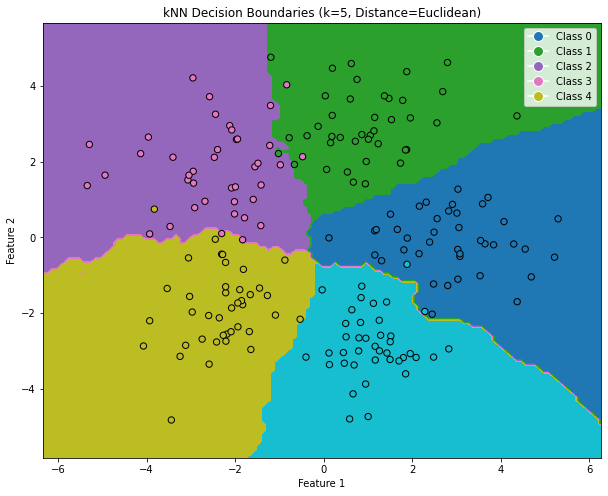

In [10]:
k = 5
knn = KnnClassifier(k=k)
knn.fit(X_train, y_train)

plot_decision_boundaries(
    classifier=knn,
    X=X_train,
    y=y_train,
    means=class_means,
    title=f'kNN Decision Boundaries (k={k}, Distance=Euclidean)'
)

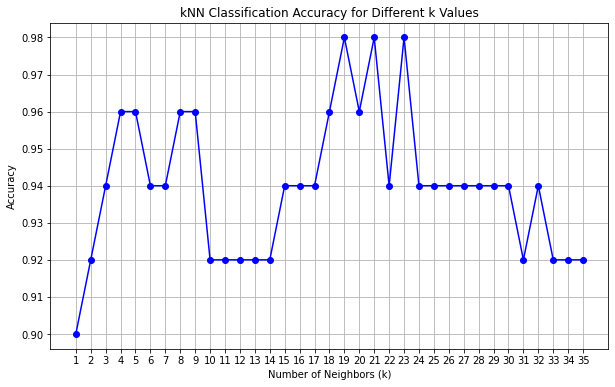

In [11]:
k_values   = range(1, 36)
accuracies = []

for k in k_values:
    knn = KnnClassifier(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc    = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

 # plotting Accuracy for different values of k
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('kNN Classification Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()    

## Appendices

### Appendix1


The active selection X[y == i, 0], X[y == i, 1] is a way to filter and access specific elements from a NumPy array X based on a condition applied to another array y. Here’s a detailed breakdown:

1. **Condition Filtering**: The expression y == i creates a boolean array where each element is `True` if the corresponding element in y is equal to i, and `False` otherwise. This boolean array is used to filter the rows of X
2. **Indexing**: 
X[y == i, 0] and X[y == i, 1] use this boolean array to select rows from X where the condition y == i is `True`. The `0` and `1` after the comma specify that we are selecting the first and second columns of these filtered rows, respectively.

3. **Tuple Creation**: The result is a tuple containing two arrays: the first array consists of the elements from the first column of X where the condition is met, and the second array consists of the elements from the second column of X
where the condition is met.

In the context of a scatter plot, this selection is typically used to plot points of a specific class or category (denoted by i) with their corresponding x and y coordinates. This allows for visual differentiation of data points belonging to different classes.

i: 0
X[y == 0, 0]: [1 5]
X[y == 0, 1]: [2 6]
i: 1
X[y == 1, 0]: [3 7]
X[y == 1, 1]: [4 8]


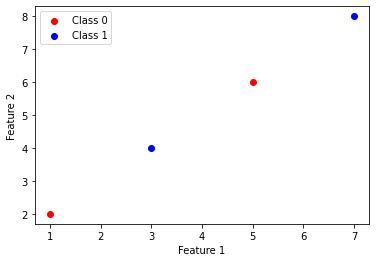

In [12]:
# Sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 1, 0, 1])
colors = ['red', 'blue']

# Plotting
for i in np.unique(y):
    print(f"i: {i}")
    print(f"X[y == {i}, 0]: {X[y == i, 0]}")
    print(f"X[y == {i}, 1]: {X[y == i, 1]}")
    #X[y == i, 0]: Selects the first feature (x-coordinate) of samples where the label y is equal to i.
    #X[y == i, 1]: Selects the second feature (y-coordinate) of samples where the label y is equal to i.
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=f'Class {i}')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

No problem! Let's break down `np.meshgrid` in a simpler way with a focus on what it does and how it can be used.

### What is `np.meshgrid`?

`np.meshgrid` is a function that helps you create a grid of coordinates from two or more 1D arrays (lists of numbers). This is particularly useful when you want to evaluate functions over a grid or create plots in 2D space.

### How Does It Work?

Imagine you have two lists of numbers, one representing the x-coordinates and the other representing the y-coordinates. `np.meshgrid` takes these two lists and creates two 2D arrays (grids) that represent all combinations of the x and y coordinates.

### Example Step-by-Step

Let's say we have the following two lists:

- **x-coordinates**: `[0, 1, 2]`
- **y-coordinates**: `[0, 1]`

When we use `np.meshgrid`, it will create two 2D arrays:

1. **X Array**: This will contain the x-coordinates repeated for each y-coordinate.
2. **Y Array**: This will contain the y-coordinates repeated for each x-coordinate.

### Code Example

Here's how it looks in code:

```python
import numpy as np

# Define the x and y coordinates
x = np.array([0, 1, 2])  # x-coordinates
y = np.array([0, 1])     # y-coordinates

# Create the meshgrid
X, Y = np.meshgrid(x, y)

print("X:\n", X)
print("Y:\n", Y)
```

### Output Explanation

When you run the code, you get:

```
X:
 [[0 1 2]
 [0 1 2]]

Y:
 [[0 0 0]
 [1 1 1]]
```

- **X Array**: 
  - The first row is `[0, 1, 2]` (the x-coordinates).
  - The second row is also `[0, 1, 2]` (the same x-coordinates repeated for each y-coordinate).

- **Y Array**:
  - The first row is `[0, 0, 0]` (the first y-coordinate repeated for each x-coordinate).
  - The second row is `[1, 1, 1]` (the second y-coordinate repeated for each x-coordinate).

### Visualizing the Grid

You can think of the output as a grid of points:

- The point `(0, 0)` corresponds to `X[0, 0]` and `Y[0, 0]`.
- The point `(1, 0)` corresponds to `X[0, 1]` and `Y[0, 1]`.
- The point `(2, 0)` corresponds to `X[0, 2]` and `Y[0, 2]`.
- The point `(0, 1)` corresponds to `X[1, 0]` and `Y[1, 0]`.
- The point `(1, 1)` corresponds to `X[1, 1]` and `Y[1, 1]`.
- The point `(2, 1)` corresponds to `X[1, 2]` and `Y[1, 2]`.

### Summary

- `np.meshgrid` takes two 1D arrays and creates two 2D arrays that represent all combinations of the x and y coordinates.
- This is useful for evaluating functions over a grid or for plotting in 2D.

If you have any specific questions or need further clarification, feel free to ask!

The line of code you provided is using Matplotlib, a popular plotting library in Python, to create a colormap for visualizing data. Let's break it down:

### Code Breakdown

```python
colors = plt.get_cmap('tab10', np.unique(y).size + 1)
```

1. **`plt.get_cmap('tab10', ...)`**:
   - This function retrieves a colormap from Matplotlib. The `'tab10'` colormap is one of the predefined colormaps in Matplotlib, specifically designed for categorical data. It contains 10 distinct colors that are easily distinguishable from one another.
   - The second argument specifies the number of colors to be used from the colormap.

2. **`np.unique(y)`**:
   - This function from NumPy returns the unique values in the array `y`. If `y` contains categorical data (like class labels), `np.unique(y)` will give you the different categories present in `y`.

3. **`np.unique(y).size`**:
   - This part calculates the number of unique values (or categories) in `y`. The `.size` attribute returns the count of these unique values.

4. **`np.unique(y).size + 1`**:
   - The `+ 1` is added to ensure that there is one extra color available in case there are more unique categories than the default 10 colors in the `'tab10'` colormap. This is useful if you want to ensure that you have enough colors to represent all unique categories in your data.

### What the Code Does

Overall, this line of code creates a colormap object called `colors` that contains a set of colors from the `'tab10'` colormap, with a number of colors equal to the number of unique categories in `y` plus one. This colormap can then be used for plotting, ensuring that each unique category in `y` is represented by a distinct color.

### Example Usage

Here's a simple example of how this might be used in a plotting context:

```python
import numpy as np
import matplotlib.pyplot as plt

# Example data
y = np.array([0, 1, 2, 1, 0, 2, 3])  # Some categorical data

# Get the colormap
colors = plt.get_cmap('tab10', np.unique(y).size + 1)

# Example of using the colors in a scatter plot
for i in np.unique(y):
    plt.scatter(np.random.rand(10), np.random.rand(10), color=colors(i), label=f'Category {i}')

plt.legend()
plt.show()
```

In this example, each unique category in `y` is represented by a different color in the scatter plot.

Certainly! Let's break down each of the two lines of code you provided, which are used for plotting in Matplotlib, specifically for creating contour plots and scatter plots.

### Line 1: `plt.contourf(xx, yy, Z, alpha=0.5, cmap=colors)`

#### Explanation of Parameters:

1. **`plt.contourf(...)`**:
   - This function creates filled contour plots. It is used to visualize three-dimensional data in two dimensions by plotting contour lines and filling the areas between them.

2. **`xx` and `yy`**:
   - These are typically 2D arrays created using `np.meshgrid`, representing the grid of x and y coordinates over which the function `Z` is evaluated. 
   - `xx` contains the x-coordinates, and `yy` contains the y-coordinates.

3. **`Z`**:
   - This is a 2D array that contains the values of the function you want to visualize at each point defined by the coordinates in `xx` and `yy`. The values in `Z` determine the height of the contour lines.

4. **`alpha=0.5`**:
   - This parameter sets the transparency level of the filled contours. An `alpha` value of 0 means fully transparent, and a value of 1 means fully opaque. Here, `0.5` means the contours will be semi-transparent.

5. **`cmap=colors`**:
   - This specifies the colormap to use for coloring the filled contours. The `colors` variable is expected to be a colormap object (e.g., created using `plt.get_cmap(...)`), which defines how the values in `Z` are mapped to colors.

#### What This Line Does:
This line creates a filled contour plot based on the values in `Z`, using the x-coordinates from `xx` and the y-coordinates from `yy`. The contours are filled with colors defined by the `colors` colormap, and they are semi-transparent due to the `alpha` setting.

### Line 2: `plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, s=40, edgecolors='k')`

#### Explanation of Parameters:

1. **`plt.scatter(...)`**:
   - This function creates a scatter plot, which displays individual data points on a 2D plane.

2. **`X[:, 0]` and `X[:, 1]`**:
   - Here, `X` is typically a 2D array where each row represents a data point and each column represents a feature. 
   - `X[:, 0]` extracts all the values from the first column (x-coordinates), and `X[:, 1]` extracts all the values from the second column (y-coordinates).

3. **`c=y`**:
   - This parameter specifies the color of each point in the scatter plot based on the values in `y`. The `y` array usually contains categorical labels or class indices that correspond to the data points in `X`.

4. **`cmap=colors`**:
   - Similar to the first line, this specifies the colormap to use for coloring the points in the scatter plot based on the values in `y`.

5. **`s=40`**:
   - This parameter sets the size of the scatter plot markers. A value of `40` means that the markers will be relatively large.

6. **`edgecolors='k'`**:
   - This parameter sets the color of the edges of the scatter plot markers. Here, `'k'` stands for black, meaning the edges of the markers will be black.

#### What This Line Does:
This line creates a scatter plot of the data points defined by `X`, where the x-coordinates are taken from the first column and the y-coordinates from the second column. The color of each point is determined by the corresponding value in `y`, using the specified colormap. The markers are set to a size of 40 and have black edges.

### Summary

- The first line creates a filled contour plot to visualize a function over a grid defined by `xx` and `yy`, using the values in `Z` to determine the color of the contours.
- The second line overlays a scatter plot of data points on top of the contour plot, coloring the points based on their class labels in `y`.

Together, these two lines allow you to visualize both the underlying function (through contours) and the actual data points (through the scatter plot) in a single plot, which is useful for understanding the relationship between the data and the function being visualized.

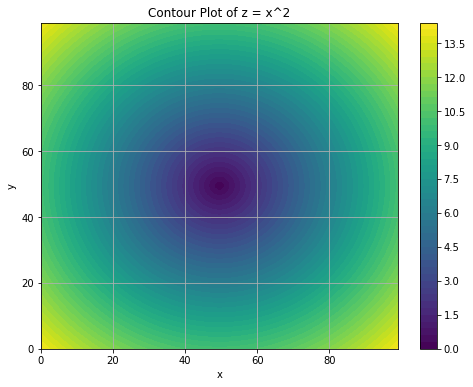

In [13]:

# Step 1: Create a grid of x and y values
x = np.linspace(-10, 10, 100)  # 100 points from -10 to 10
y = np.linspace(-10, 10, 100)  # 100 points from -10 to 10
X, Y = np.meshgrid(x, y)        # Create a meshgrid


Z = np.sqrt(X**2 + Y**2)  # Calculate z values for the cone

# Step 3: Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(Z, levels=50, cmap='viridis')  # Filled contour plot
plt.colorbar(contour)  # Add a color bar to indicate the scale
plt.title('Contour Plot of z = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()